# Model building and Evaluation

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from File_Operations import file_operations
from Application_Logging import logger

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBClassifier
from sklearn.metrics import  classification_report,accuracy_score,roc_curve,roc_auc_score,confusion_matrix

#### Data preprocessing and splitting it into train and test dataset

In [4]:
data = pd.read_csv("EDA/Credit_Card_Trainingset.csv")
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
x_data = data.drop("IsDefaulter",axis=1).values

In [6]:
x_data[0:5]

array([[ 2.0000e+04,  2.0000e+00,  2.0000e+00,  1.0000e+00,  2.4000e+01,
         2.0000e+00,  2.0000e+00, -1.0000e+00, -1.0000e+00, -2.0000e+00,
        -2.0000e+00,  3.9130e+03,  3.1020e+03,  6.8900e+02,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  6.8900e+02,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 1.2000e+05,  2.0000e+00,  2.0000e+00,  2.0000e+00,  2.6000e+01,
        -1.0000e+00,  2.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         2.0000e+00,  2.6820e+03,  1.7250e+03,  2.6820e+03,  3.2720e+03,
         3.4550e+03,  3.2610e+03,  0.0000e+00,  1.0000e+03,  1.0000e+03,
         1.0000e+03,  0.0000e+00,  2.0000e+03],
       [ 9.0000e+04,  2.0000e+00,  2.0000e+00,  2.0000e+00,  3.4000e+01,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  2.9239e+04,  1.4027e+04,  1.3559e+04,  1.4331e+04,
         1.4948e+04,  1.5549e+04,  1.5180e+03,  1.5000e+03,  1.0000e+03,
         1.0000e+03,  1.0000

In [7]:
y_data = data["IsDefaulter"].values

In [8]:
y_data[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

##### Standardization of input data

In [14]:
m = logger.App_logger()
file_inst = file_operations.File_Operations("training",m,"Logs/Training.log")
train_scaler = StandardScaler()
scaler = train_scaler.fit(x_data)
file_inst.save_model(scaler,"scaler")
x_stand = scaler.transform(x_data)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_stand,y_data,test_size=0.20,random_state=100)

In [23]:
x_train.shape

(37382, 23)

In [24]:
x_test.shape

(9346, 23)

In [25]:
y_train.shape

(37382,)

In [27]:
y_test.shape

(9346,)

### Model Selection

#### Logistic Regression

In [18]:
l_r = LogisticRegression()
param_grid = {'penalty':['l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_lr_clf = GridSearchCV(l_r, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(x_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='accuracy', verbose=3)

In [19]:
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [20]:
lr_opt = LogisticRegression(penalty="l2",C = 0.01)
lr_opt.fit(x_train,y_train)
y_pred = lr_opt.predict(x_test)

In [21]:
print("Accuracy of Logistic Regression model:",accuracy_score(y_test,y_pred))
print("Confusion matrix of Logistic Regression model:\n",confusion_matrix(y_test,y_pred))
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_pred)
print("AUC score of Logistic Regression model:",lr_auc)

Accuracy of Logistic Regression model: 0.7269420072758399
Confusion matrix of Logistic Regression model:
 [[3438 1257]
 [1295 3356]]
AUC score of Logistic Regression model: 0.7269168126954731


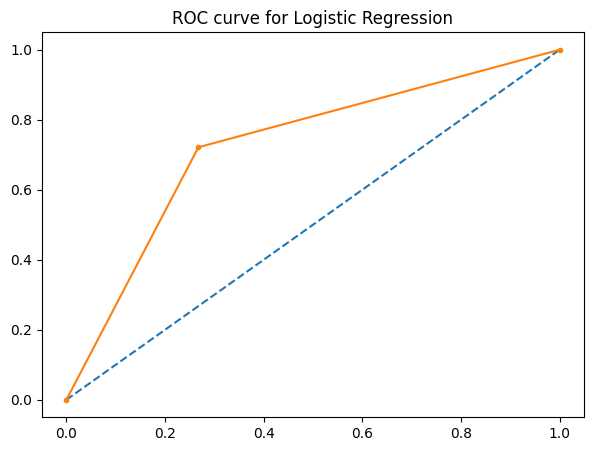

In [46]:
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
plt.figure(figsize=(7,5))
plt.plot(ns_fpr, ns_tpr,"--")
plt.plot(lr_fpr,lr_tpr,marker =".")
plt.title("ROC curve for Logistic Regression")
plt.show()

#### SVC

In [9]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 
grid_svc_clf = GridSearchCV(svc, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_svc_clf.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [23]:
grid_svc_clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [24]:
svc_opt = SVC(C = 100,kernel="rbf")
svc_opt.fit(x_train,y_train)
y_pred = svc_opt.predict(x_test)

In [25]:
print("Accuracy of SVC model:",accuracy_score(y_test,y_pred))
print("Confusion matrix of SVC model:\n",confusion_matrix(y_test,y_pred))
svc_fpr, svc_tpr, _ = roc_curve(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
print("AUC score of SVC model:",svc_auc)

Accuracy of SVC model: 0.785148726728012
Confusion matrix of SVC model:
 [[3751  944]
 [1064 3587]]
AUC score of SVC model: 0.7850835151967273


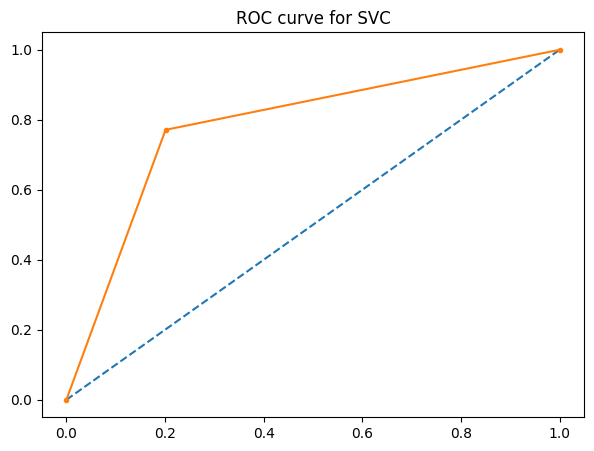

In [47]:
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
plt.figure(figsize=(7,5))
plt.plot(ns_fpr, ns_tpr,"--")
plt.plot(svc_fpr,svc_tpr,marker =".")
plt.title("ROC curve for SVC")
plt.show()

#### GuassianNB

In [27]:
gnb = GaussianNB()
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
grid_gnb_clf = GridSearchCV(gnb,param_grid, cv=5,  verbose=3)
grid_gnb_clf.fit(x_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.599 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.584 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.584 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.591 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.584 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.602 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.588 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.586 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.595 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.589 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.599 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [28]:
grid_gnb_clf.best_params_

{'var_smoothing': 0.5}

In [29]:
gnb_opt = GaussianNB(var_smoothing=0.5)
gnb_opt.fit(x_train,y_train)
y_pred = gnb_opt.predict(x_test)

In [30]:
print("Accuracy of GaussianNB model:",accuracy_score(y_test,y_pred))
print("Confusion matrix of GaussianNB model:\n",confusion_matrix(y_test,y_pred))
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_pred)
gnb_auc = roc_auc_score(y_test, y_pred)
print("AUC score of GaussianNB model:",gnb_auc)

Accuracy of GaussianNB model: 0.6061416648833725
Confusion matrix of GaussianNB model:
 [[1445 3250]
 [ 431 4220]]
AUC score of GaussianNB model: 0.6075529922567524


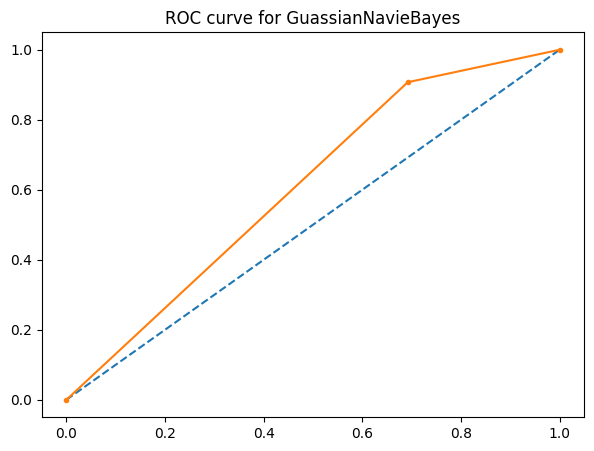

In [48]:
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
plt.figure(figsize=(7,5))
plt.plot(ns_fpr, ns_tpr,"--")
plt.plot(gnb_fpr,gnb_tpr,marker =".")
plt.title("ROC curve for GuassianNavieBayes")
plt.show()

#### RandomForsetClassifier

In [32]:
rfc = RandomForestClassifier()
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}
grid_rfc_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rfc_clf.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [33]:
grid_rfc_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [34]:
rfc_opt = RandomForestClassifier(max_depth=30,n_estimators=150)
rfc_opt.fit(x_train,y_train)
y_pred = rfc_opt.predict(x_test)

In [35]:
print("Accuracy of RandomForestClassifier model:",accuracy_score(y_test,y_pred))
print("Confusion matrix of RandomForestClassifier model:\n",confusion_matrix(y_test,y_pred))
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, y_pred)
rfc_auc = roc_auc_score(y_test, y_pred)
print("AUC score of RandomForestClassifier model:",rfc_auc)

Accuracy of RandomForestClassifier model: 0.8495613096511877
Confusion matrix of RandomForestClassifier model:
 [[4044  651]
 [ 755 3896]]
AUC score of RandomForestClassifier model: 0.8495055857306444


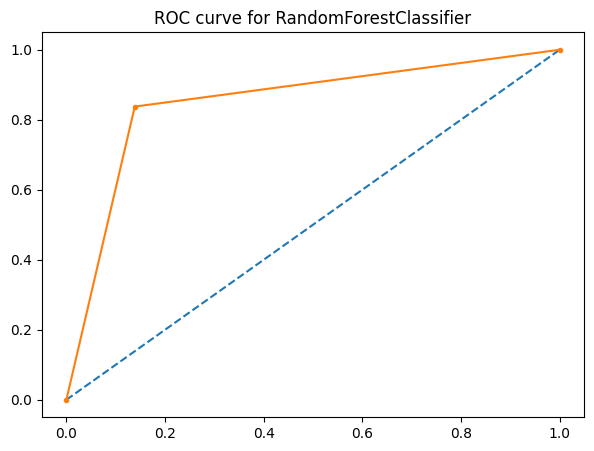

In [49]:
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
plt.figure(figsize=(7,5))
plt.plot(ns_fpr, ns_tpr,"--")
plt.plot(rfc_fpr,rfc_tpr,marker =".")
plt.title("ROC curve for RandomForestClassifier")
plt.show()

#### XGBClassifier

In [37]:
param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
grid_xgb_clf = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_grid, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
grid_xgb_clf.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [38]:
grid_xgb_clf.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [43]:
xgb_opt = XGBClassifier(max_depth=9,min_child_weight = 1)
xgb_opt.fit(x_train,y_train)
y_pred = xgb_opt.predict(x_test)

In [44]:
print("Accuracy of XGBClassifier model:",accuracy_score(y_test,y_pred))
print("Confusion matrix of XGBClassifier model:\n",confusion_matrix(y_test,y_pred))
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)
print("AUC score of XGBClassifier model:",xgb_auc)

Accuracy of XGBClassifier model: 0.8423924673657179
Confusion matrix of XGBClassifier model:
 [[4031  664]
 [ 809 3842]]
AUC score of XGBClassifier model: 0.8423159310043369


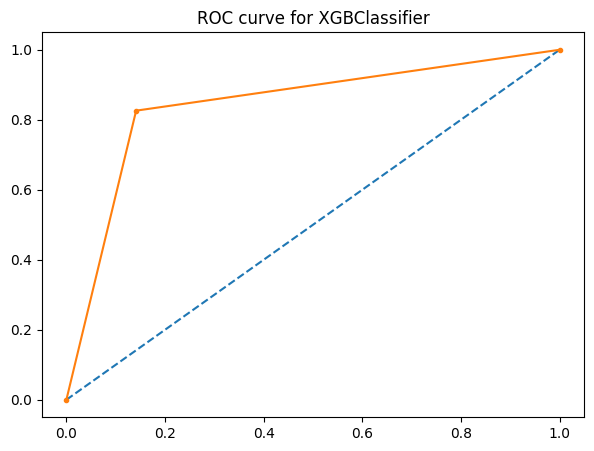

In [50]:
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
plt.figure(figsize=(7,5))
plt.plot(ns_fpr, ns_tpr,"--")
plt.plot(xgb_fpr,xgb_tpr,marker =".")
plt.title("ROC curve for XGBClassifier")
plt.show()

#### Conclusion

From the above model evaluation process it is observed that the models RandomForestClassifier and XGBClassifier have high accuracy and ROC_AUC score compared to other models.

Both RandomForestClassifier and XGBClassifier is choosen for model serialization and prediction